# 🌾 Lakota AI Code Camp · Week 1 Capstone

You’ve reached the summit of Week 1—time to turn data into insight!  
In this notebook you’ll explore weather data, build a predictive model, and craft a story about the Black Hills climate.

---

## 🎯 Objectives  

| # | Deliverable | Notes |
|---|-------------|-------|
| **1** | **4 +** charts that reveal something interesting | Feel free to blend in **any additional datasets** (local CSVs, web downloads, etc.). |
| **2** | A model that predicts **tomorrow’s `TMAX`** | **Use only `rapid_city_weather.csv` for training.** Report R²—scores go on the leaderboard. |

---

## 🛠 Allowed Resources  

* Helper cells in **this notebook**  
* Any code or notes in the course repo  
* External LLMs (e.g., chat.indigigenius.org)  
* **More data** for storytelling: browse NOAA’s Climate Data Online search → <https://www.ncei.noaa.gov/cdo-web/search>
* Documentation for the datasets above can be found here <https://www.ncei.noaa.gov/data/daily-summaries/doc/GHCND_documentation.pdf>
* TAs / Instructors — Will provide code help **AFTER** you and your partner outline a plan

---

## 🏆 Judging Criteria  

1. **Curiosity** – depth and creativity of questions explored  
2. **Visualization Quality** – clarity, relevance, and style of charts  
3. **Story Cohesion** – how smoothly your narrative connects data, visuals, and conclusions  
4. **Model Performance** – R² compared with peers  

**Top three teams win Xbox controllers.** 🎮

---

### ✅ Submission Checklist  

- [ ] Notebook runs top-to-bottom without errors  
- [ ] ≥ 4 charts included in the final narrative  
- [ ] `tomorrow_tmax_model()` (or your variant) executed with R² printed  
- [ ] Notebook ready for a 5-minute presentation


---

## 🚀 How to Tackle the Presentation

1. **Plan your story**  
   *What’s interesting to you?* Jot a few questions or hypotheses in a markdown cell or in your notebook. Decide whether you’ll study the entire time-series or zoom in on specific periods (e.g., storm seasons, drought years).

2. **Read and test the given material**  
   Read this notebook thoroughly from top to bottom. Try to make sense of what everything does. Change any of the available parameters to see what they do. If you don’t know what something does, ask chat.indigigenius.org! There are also links to more documentation for certain aspects of the project—read those too.

3. **Explore the data**  
   Run helper cells, slice dates, plot quick charts. Follow your curiosity—even if it takes you somewhere new. Update your notes as your focus evolves.

4. **Assemble your presentation**  
   Create a narrative arc: introduction → key findings → conclusion. Feel free to use images or any other kind of media.

5. **Polish the details**  
   - Use markdown headers and short blurbs to guide the reader.  
   - Label axes, add titles, and include legends when needed.  
   - Make sure all cells run top-to-bottom without errors.

6. **Present with confidence**  
   Speak clearly, show the most compelling charts, and highlight what surprised you. Show off—this is your hard work!

---


---

## 💡 Idea Starters

Stuck on what to explore? Pick (or remix) one of these angles:

| Theme | Spark-Question(s) | Quick code nudge |
|-------|-------------------|------------------|
| **Seasons & Extremes** | *When was the hottest/coldest day each year?* <br> *Does winter wind speed look different from summer?* | `plot_time_series("tmax", rolling=30)` |
| **Storm Stories** | *Do big precipitation spikes line up with high winds?* <br> *Which month had the single wettest day on record?* | `scatter_xy("prcp", "wsf5")` |
| **Year-over-Year Change** | *Has average January temperature trended upward?* | `heatmap_monthly("tavg")` |
| **Prediction Boosters** | *Does adding wind speed features improve tomorrow-TMAX R²?* | Edit `feature_list` in `tomorrow_tmax_model()` |
| **Event Focus** | *What was the weather like during the 2012 drought?* | `df_range = df[df.year == 2012]` |
| **Snow Days** | *How often does measurable snowfall happen below 20 °F?* | `plot_hist("snow")` |
| **Custom Data Blend** | *How did the 2023 eclipse day compare to average temps?* | Bring in extra CSV rows & merge on date |

> **Tip:** Start by re-creating one chart from the “Quick code nudge,” then tweak columns, date ranges, or rolling windows until you uncover something surprising. Let that surprise drive the rest of your story!

### Micro-workflow example  

```python
# 1️⃣ Narrow to summer months
summer = df[df['month'].isin([6,7,8])]

# 2️⃣ Explore relationship between high temps and wind gusts
scatter_xy('tmax', 'wsf5', hue='year')

# 3️⃣ Turn insight into narrative


## Helper Functions

In [42]:
!pip install matplotlib  # This will install matplotlib if not already installed. It's a package for plotting in Python.
!pip install seaborn  # This will install seaborn if not already installed. It's a statistical data visualization library based on matplotlib.

In [43]:
# ======================================================
# 📦 Preprocessing: load, clean, add *lag* features
# ======================================================

# 🔧 Parameters (edit these)
CSV_PATH      = "rapid_city_weather.csv"   # data file
LAG_BACK      = 3                          # number of previous days to use as features

# --- No edits below unless you want extra engineering ---
import pandas as pd
import numpy as np

def preprocess_weather(csv_path: str, lag_back: int) -> pd.DataFrame:
    """Return tidy DataFrame with date features + lagged numeric columns."""
    df = pd.read_csv(csv_path, parse_dates=["DATE"], na_values=["", " "])
    df.columns = df.columns.str.strip().str.lower()

    id_cols = ["station", "name", "date"]
    num_cols = df.columns.difference(id_cols)
    df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

    # Date parts
    df["year"]  = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["doy"]   = df["date"].dt.dayofyear

    # Tomorrow target
    df["tmax_plus_1d"] = df["tmax"].shift(-1)

    # Lagged features: _lag1 … _lag{lag_back}
    for lag in range(1, lag_back + 1):
        for col in num_cols:
            df[f"{col}_lag{lag}"] = df[col].shift(lag)

    # Simple fill strategy for missing numeric values (after lagging)
    df = df.fillna(method="ffill").fillna(method="bfill")

    # Remove last row (no target) and first lag_back rows (insufficient history)
    df = df.iloc[lag_back:-1].reset_index(drop=True)
    return df

# Execute preprocessing
df = preprocess_weather(CSV_PATH, LAG_BACK)
print(f"✅ Loaded {len(df):,} rows with lag_back={LAG_BACK}")
df.head()

✅ Loaded 9,279 rows with lag_back=3


/var/folders/6_/_y8v0gjj4sz2yhr732yn3_tc0000gn/T/ipykernel_38496/2045550484.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill").fillna(method="bfill")


,station,name,date,awnd,fmtm,pgtm,prcp,snow,snwd,tavg,...,snow_lag3,snwd_lag3,tavg_lag3,tmax_lag3,tmin_lag3,tsun_lag3,wdf2_lag3,wdf5_lag3,wsf2_lag3,wsf5_lag3
0,USW00024090,"RAPID CITY REGIONAL AIRPORT, SD US",2000-01-04,4.47,1452.0,1452.0,0.0,0.0,0.0,21.0,...,0.0,0.0,25.0,34.0,16.0,0.0,350.0,350.0,13.0,14.1
1,USW00024090,"RAPID CITY REGIONAL AIRPORT, SD US",2000-01-05,15.43,1423.0,1423.0,0.0,0.0,0.0,32.0,...,0.0,0.0,27.0,37.0,17.0,0.0,340.0,340.0,36.0,40.9
2,USW00024090,"RAPID CITY REGIONAL AIRPORT, SD US",2000-01-06,5.37,1133.0,1215.0,0.0,0.0,0.0,26.0,...,0.0,0.0,14.0,24.0,4.0,0.0,340.0,340.0,40.0,46.1
3,USW00024090,"RAPID CITY REGIONAL AIRPORT, SD US",2000-01-07,7.16,1051.0,1051.0,0.0,0.0,0.0,33.0,...,0.0,0.0,21.0,40.0,2.0,0.0,130.0,140.0,16.1,17.9
4,USW00024090,"RAPID CITY REGIONAL AIRPORT, SD US",2000-01-08,8.28,1456.0,1316.0,0.0,0.0,0.0,35.0,...,0.0,0.0,32.0,45.0,18.0,0.0,330.0,320.0,34.9,38.9


In [44]:
# ======================================================
# 📅 Date-Range Slicer Helper
# ======================================================

def slice_dates(dataframe, start=None, end=None):
    """
    Return a subset of `dataframe` between `start` and `end` dates (inclusive).
    
    Parameters
    ----------
    dataframe : pd.DataFrame
        Must contain a 'date' column of dtype datetime64[ns].
    start : str or pd.Timestamp or None, optional
        Earliest date to include, e.g., "2012-06-01".
        If None, slice starts at the first row.
    end : str or pd.Timestamp or None, optional
        Latest date to include, e.g., "2012-08-31".
        If None, slice ends at the last row.
    
    Returns
    -------
    pd.DataFrame
        Filtered by the specified date range.
    
    Example
    -------
    june_2020 = slice_dates(df, "2020-06-01", "2020-06-30")
    plot_flexible(june_2020)                     # use with visualizer
    """
    mask = pd.Series(True, index=dataframe.index)
    if start is not None:
        mask &= dataframe["date"] >= pd.to_datetime(start)
    if end is not None:
        mask &= dataframe["date"] <= pd.to_datetime(end)
    result = dataframe.loc[mask]
    return result


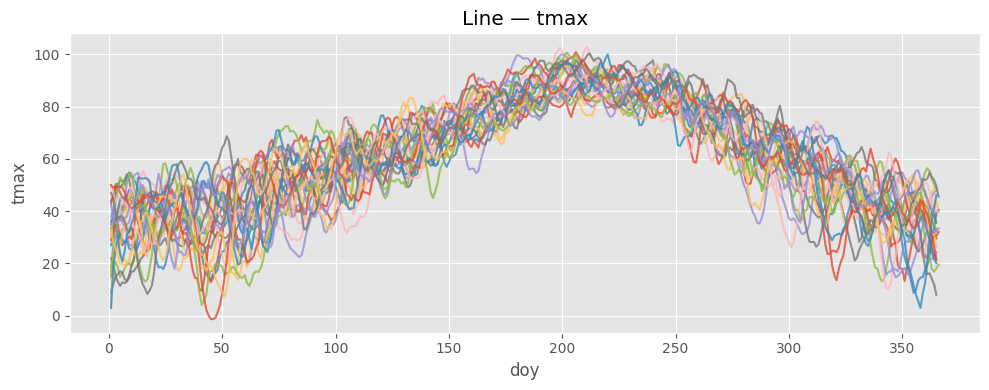

In [45]:
# ======================================================
# 📊 Flexible Visualizer  (line-per-group support)
# ======================================================

# 🔧 Parameters (edit these)
VIZ_TYPE   = "line"          # "line", "scatter", "hist", "bar", "pie"
X_COL      = "doy"           # x-axis column; try "date" or "doy" (day-of-year)
Y_COL      = "tmax"          # y-axis column (single value)
HUE_COL    = "year"          # << set to group-by column for multi-line plots
ROLLING    = 7               # rolling mean window (line plots)
TITLE      = None
XLABEL     = None
YLABEL     = None
STYLE      = "ggplot"
PIE_WEDGES = 50
LEGEND     = False

# --- No edits below this line ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(STYLE)

def plot_flexible(df):
    if VIZ_TYPE == "line":
        plt.figure(figsize=(10,4))
        if HUE_COL:
            # one line per group
            for val, grp in df.groupby(HUE_COL):
                series = grp.sort_values(X_COL).set_index(X_COL)[Y_COL]
                if ROLLING:
                    series = series.rolling(ROLLING, min_periods=1).mean()
                series.plot(label=str(val), alpha=0.8)
            if LEGEND:
                plt.legend(title=HUE_COL, bbox_to_anchor=(1.02,1), loc="upper left")
        else:
            series = df.set_index(X_COL)[Y_COL]
            if ROLLING:
                series = series.rolling(ROLLING, min_periods=1).mean()
            series.plot()

    elif VIZ_TYPE == "scatter":
        sns.scatterplot(data=df, x=X_COL, y=Y_COL, hue=HUE_COL, alpha=0.7)

    elif VIZ_TYPE == "hist":
        sns.histplot(data=df, x=Y_COL, bins=30, hue=HUE_COL, kde=True, alpha=0.8)

    elif VIZ_TYPE == "bar":
        sns.barplot(data=df, x=X_COL, y=Y_COL, hue=HUE_COL)

    elif VIZ_TYPE == "pie":
        counts  = df[Y_COL].value_counts()
        topN    = counts.iloc[:PIE_WEDGES]
        other   = counts.iloc[PIE_WEDGES:].sum()
        plot_series = pd.concat([topN, pd.Series({"Other": other})])
        plt.figure(figsize=(6,6))
        plot_series.plot.pie(autopct='%1.1f%%',
                             startangle=90, counterclock=False)

    else:
        raise ValueError("Invalid VIZ_TYPE")

    plt.title(TITLE or f"{VIZ_TYPE.title()} — {Y_COL}")
    if VIZ_TYPE != "pie":
        plt.xlabel(XLABEL or X_COL)
        plt.ylabel(YLABEL or Y_COL)
    plt.tight_layout()
    plt.show()

# Example: overlay tmax curves for each year
# (make sure you already added 'year' and 'doy' columns in preprocessing)
plot_flexible(df)


In [47]:
# Reruns the pre-processing in case df was overwritten above
# ======================================================
# 📦 Preprocessing: load, clean, add *lag* features
# ======================================================

# 🔧 Parameters (edit these)
CSV_PATH      = "rapid_city_weather.csv"   # data file
LAG_BACK      = 3                          # number of previous days to use as features

# --- No edits below unless you want extra engineering ---
import pandas as pd
import numpy as np

def preprocess_weather(csv_path: str, lag_back: int) -> pd.DataFrame:
    """Return tidy DataFrame with date features + lagged numeric columns."""
    df = pd.read_csv(csv_path, parse_dates=["DATE"], na_values=["", " "])
    df.columns = df.columns.str.strip().str.lower()

    id_cols = ["station", "name", "date"]
    num_cols = df.columns.difference(id_cols)
    df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

    # Date parts
    df["year"]  = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["doy"]   = df["date"].dt.dayofyear

    # Tomorrow target
    df["tmax_plus_1d"] = df["tmax"].shift(-1)

    # Lagged features: _lag1 … _lag{lag_back}
    for lag in range(1, lag_back + 1):
        for col in num_cols:
            df[f"{col}_lag{lag}"] = df[col].shift(lag)

    # Simple fill strategy for missing numeric values (after lagging)
    df = df.fillna(method="ffill").fillna(method="bfill")

    # Remove last row (no target) and first lag_back rows (insufficient history)
    df = df.iloc[lag_back:-1].reset_index(drop=True)
    return df

# Execute preprocessing
df = preprocess_weather(CSV_PATH, LAG_BACK)
print(f"✅ Loaded {len(df):,} rows with lag_back={LAG_BACK}")
df.head()

✅ Loaded 9,279 rows with lag_back=3


/var/folders/6_/_y8v0gjj4sz2yhr732yn3_tc0000gn/T/ipykernel_38496/3820437226.py:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill").fillna(method="bfill")


,station,name,date,awnd,fmtm,pgtm,prcp,snow,snwd,tavg,...,snow_lag3,snwd_lag3,tavg_lag3,tmax_lag3,tmin_lag3,tsun_lag3,wdf2_lag3,wdf5_lag3,wsf2_lag3,wsf5_lag3
0,USW00024090,"RAPID CITY REGIONAL AIRPORT, SD US",2000-01-04,4.47,1452.0,1452.0,0.0,0.0,0.0,21.0,...,0.0,0.0,25.0,34.0,16.0,0.0,350.0,350.0,13.0,14.1
1,USW00024090,"RAPID CITY REGIONAL AIRPORT, SD US",2000-01-05,15.43,1423.0,1423.0,0.0,0.0,0.0,32.0,...,0.0,0.0,27.0,37.0,17.0,0.0,340.0,340.0,36.0,40.9
2,USW00024090,"RAPID CITY REGIONAL AIRPORT, SD US",2000-01-06,5.37,1133.0,1215.0,0.0,0.0,0.0,26.0,...,0.0,0.0,14.0,24.0,4.0,0.0,340.0,340.0,40.0,46.1
3,USW00024090,"RAPID CITY REGIONAL AIRPORT, SD US",2000-01-07,7.16,1051.0,1051.0,0.0,0.0,0.0,33.0,...,0.0,0.0,21.0,40.0,2.0,0.0,130.0,140.0,16.1,17.9
4,USW00024090,"RAPID CITY REGIONAL AIRPORT, SD US",2000-01-08,8.28,1456.0,1316.0,0.0,0.0,0.0,35.0,...,0.0,0.0,32.0,45.0,18.0,0.0,330.0,320.0,34.9,38.9


In [53]:
# Current potential features to add. Consider increasing the lag_back parameter to add more features.
df.columns

Index(['station', 'name', 'date', 'awnd', 'fmtm', 'pgtm', 'prcp', 'snow',
       'snwd', 'tavg', 'tmax', 'tmin', 'tsun', 'wdf2', 'wdf5', 'wsf2', 'wsf5',
       'year', 'month', 'doy', 'tmax_plus_1d', 'awnd_lag1', 'fmtm_lag1',
       'pgtm_lag1', 'prcp_lag1', 'snow_lag1', 'snwd_lag1', 'tavg_lag1',
       'tmax_lag1', 'tmin_lag1', 'tsun_lag1', 'wdf2_lag1', 'wdf5_lag1',
       'wsf2_lag1', 'wsf5_lag1', 'awnd_lag2', 'fmtm_lag2', 'pgtm_lag2',
       'prcp_lag2', 'snow_lag2', 'snwd_lag2', 'tavg_lag2', 'tmax_lag2',
       'tmin_lag2', 'tsun_lag2', 'wdf2_lag2', 'wdf5_lag2', 'wsf2_lag2',
       'wsf5_lag2', 'awnd_lag3', 'fmtm_lag3', 'pgtm_lag3', 'prcp_lag3',
       'snow_lag3', 'snwd_lag3', 'tavg_lag3', 'tmax_lag3', 'tmin_lag3',
       'tsun_lag3', 'wdf2_lag3', 'wdf5_lag3', 'wsf2_lag3', 'wsf5_lag3'],
      dtype='object')

In [ ]:
# ======================================================
# 🤖 Tomorrow-TMAX Model  (history size = LAG_BACK)
# ======================================================

# 🔧 Parameters (edit these)
MODEL_TYPE   = "linear"          # "linear" or "random_forest"
LAG_BACK     = 3                 # must match preprocessing cell
FEATURES     = ["tmax", "tmin", "doy"]  # list of feature columns; None = auto-lag

# --- No edits needed below ---
TEST_SIZE    = 0.2
RANDOM_STATE = 42
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd
import numpy as np

# 1️⃣  Choose algorithm
if MODEL_TYPE == "linear":
    from sklearn.linear_model import LinearRegression as Regressor
    model_params = {}
elif MODEL_TYPE == "random_forest":
    from sklearn.ensemble import RandomForestRegressor as Regressor
    model_params = {"n_estimators": 300, "random_state": RANDOM_STATE}
else:
    raise ValueError("MODEL_TYPE must be 'linear' or 'random_forest'")

# 2️⃣  Target and default feature list
TARGET = "tmax_plus_1d"

if FEATURES is None:
    # default: every numeric lag feature (_lag1 … _lag{LAG_BACK})
    FEATURES = [
        c for c in df.columns
        if c.endswith(tuple([f"_lag{i}" for i in range(1, LAG_BACK + 1)]))
    ]

# 3️⃣  Train / test split
X = df[FEATURES]
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

# 4️⃣  Train the model
model = Regressor(**model_params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 5️⃣  Naïve baseline (tomorrow TMAX = today TMAX)
baseline = df.loc[X_test.index, "tmax"].values  # works even if not a feature

# 6️⃣  Metrics
print(f"{MODEL_TYPE.title()} Model  ➜  R²: {r2_score(y_test, y_pred):.3f} | "
      f"MAE: {mean_absolute_error(y_test, y_pred):.2f} °F")
print(f"Naïve baseline     ➜  R²: {r2_score(y_test, baseline):.3f} | "
      f"MAE: {mean_absolute_error(y_test, baseline):.2f} °F")


Linear Model  ➜  R²: 0.784 | MAE: 8.36 °F
Naïve baseline     ➜  R²: 0.754 | MAE: 8.77 °F


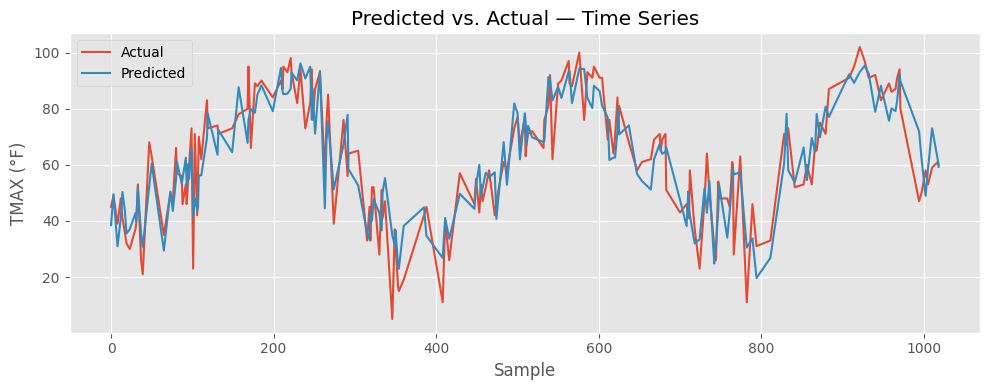

In [49]:
# ======================================================
# 📈 Actual vs. Predicted Visualizer
#    (run AFTER the modeling cell)
# ======================================================

# 🔧 Parameters (edit these)
PLOT_KIND = "line"   # "scatter" or "line"
N_DISPLAY = 200         # for line plot: number of points to show (None = all)
STYLE      = "ggplot"

# --- No edits needed below ---
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use(STYLE)

# Make sure y_test & y_pred exist (from modeling cell)
try:
    y_test, y_pred
except NameError:
    raise RuntimeError("Run the modeling cell first to create y_test and y_pred.")

if PLOT_KIND == "scatter":
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
    plt.plot(lims, lims, 'k--', linewidth=1)
    plt.xlabel("Actual TMAX (°F)")
    plt.ylabel("Predicted TMAX (°F)")
    plt.title("Predicted vs. Actual — Scatter")
    plt.tight_layout()

elif PLOT_KIND == "line":
    df_plot = pd.DataFrame({
        "Actual": y_test,
        "Predicted": y_pred
    }).sort_index()                # keep chronological order
    if N_DISPLAY:
        df_plot = df_plot.head(N_DISPLAY)
    df_plot.plot(figsize=(10,4))
    plt.xlabel("Sample")
    plt.ylabel("TMAX (°F)")
    plt.title("Predicted vs. Actual — Time Series")
    plt.tight_layout()

else:
    raise ValueError("PLOT_KIND must be 'scatter' or 'line'")

plt.show()


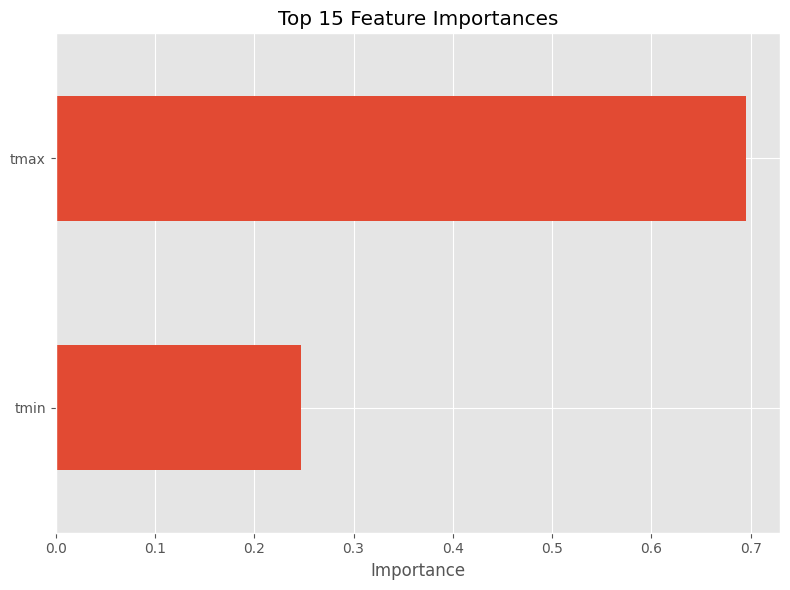

In [50]:
# ======================================================
# 🌟 Feature Importance Plot
#    (run AFTER the modeling cell)
# ======================================================

# 🔧 Parameters (edit these)
TOP_N       = 15           # how many top features to display
ABS_COEF    = True         # linear models: use absolute value of coefficients
STYLE       = "ggplot"

# --- No edits below unless you add new model types ---
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(STYLE)

def get_importances(model, feature_names):
    """Return Series of feature importances for RF or linear."""
    if hasattr(model, "feature_importances_"):
        return pd.Series(model.feature_importances_, index=feature_names)

    if hasattr(model, "coef_"):
        coef = model.coef_.ravel()  # works for 1-target linear reg
        if ABS_COEF:
            coef = np.abs(coef)
        return pd.Series(coef, index=feature_names)

    raise ValueError("Model type not supported for importance plot.")

# ---- build and plot ----
importances = get_importances(model, FEATURES).sort_values(ascending=False)[:TOP_N]

plt.figure(figsize=(8, TOP_N * 0.4))
importances[::-1].plot.barh()
plt.title(f"Top {TOP_N} Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
